# Pymaceuticals Inc.
---

## Analysis

### Summary:
- When we start out by examining the summary statistics, we can see that both the mean/median tumor volumes for Capomulin and Remicane are substantially lower than the other drugs. In addition to these values, we can also see the tumor volume variance and standard deviation for Capomulin and Remicaneare substantially lower than the other drugs.

- When we move down further and explore the box plot that examines final tumor volume, we can see again that Capomulin and Remicane seem to have a far lower tumor volume medians and variation. That being said, out of the other two drugs being examined in the box plot, Infubinol, seems to have a similar level of variation. This is further supported when we look closer at the interquartile range for these four drugs. Capomulin comes out with the lowest IQR of 7.78 mm3, followed closely by Remicane at 9.10 mm3 and Infubinol at 11.48 mm3.

- When we examine a specific case sample (mouse l509) involving Capomulin, our line plot heavily suggests a rapid decrease in tumor volume over timepoints. 

- Finally, as we look at the scatter plot comparing weight to average tumor volume we can see it suggests a positive linear relationship. This is further supported through the correlation coefficient and linear regression line.  Given our correlation coefficient of  approximately .84,  it would suggest that weight and average tumor volume have a strong positive linear relationship.

### Conclusion:
- There appears to be a fair amount of data that Capomulin and Remicane could be lowering the volume size of the tumors in the mice. Given this data and the additional graphs, Capomulin and Remicane may be promising drugs to examine further. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_df = pd.merge(study_results,mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
complete_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# filter for finding the duplicate mouse id
filt = complete_df.duplicated(subset=["Mouse ID", "Timepoint"])

# Isolates any duplicate mouse ids
duplicate_mouse_id = complete_df[filt]["Mouse ID"].unique()

# Displays the duplicate mouse ids
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_df.loc[complete_df["Mouse ID"]==duplicate_mouse_id[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = complete_df.loc[complete_df["Mouse ID"]!=duplicate_mouse_id[0]]
# Displays the first 5 rows in the cleaned dataframe
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor_volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_volume = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume,
              "Median Tumor Volume":median_tumor_volume,
              "Tumor Volume Variance": var_tumor_volume,
              "Tumor Volume Std. Dev.": std_tumor_volume,
              "Tumor Volume Std. Err.": sem_tumor_volume})

# Display summary statistics
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_v2 = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(['mean', 'median', "var",'std', 'sem'])

# Display second version of summary statistics
summary_statistics_v2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

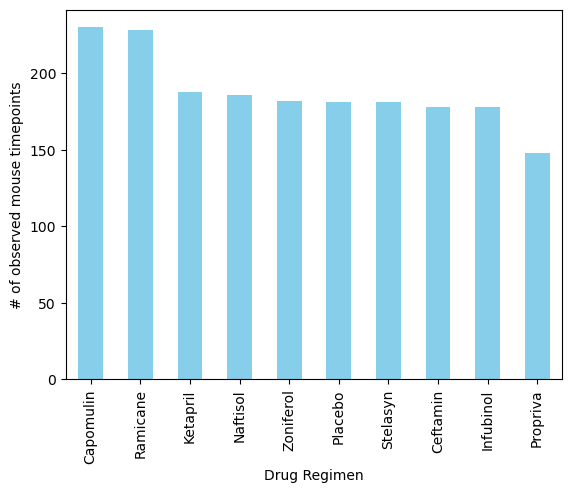

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Creates a grouped by series with drug regimen as the index
grouped_drug = cleaned_df.groupby("Drug Regimen")["Timepoint"].count()

# Resets the index so that drug regimen and timepoint are 2 columns in the dataframe
grouped_drug_df = grouped_drug.reset_index()
grouped_drug_df = grouped_drug_df.sort_values("Timepoint", ascending=False)

# Generates the bar plot of numbered timepoint observations for each drug regimen using Pandas.
bar_plot_drug_count = grouped_drug_df.plot(x='Drug Regimen', y='Timepoint', kind='bar', 
                                           color='skyblue', ylabel="# of observed mouse timepoints", legend=None)


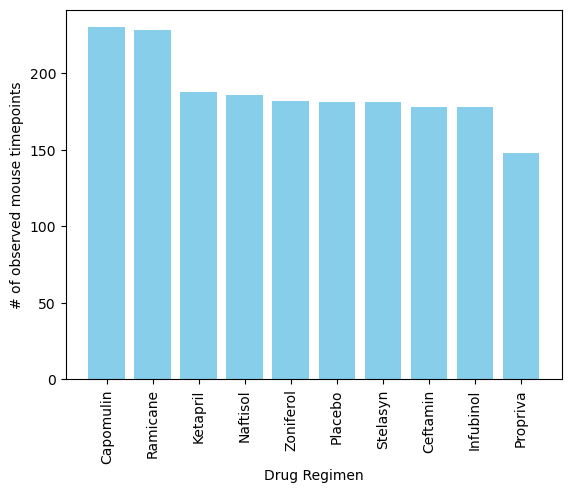

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) 
# for each drug regimen using pyplot.

# Create x and y axis for bar graph
x_axis = grouped_drug_df["Drug Regimen"]
y_axis = grouped_drug_df["Timepoint"]

# Generates the bar plot using pyplot.
plt.bar(x_axis, y_axis, color='skyblue')

# Add labels and fix x-labels
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed mouse timepoints')

# Displays the plot
plt.show()

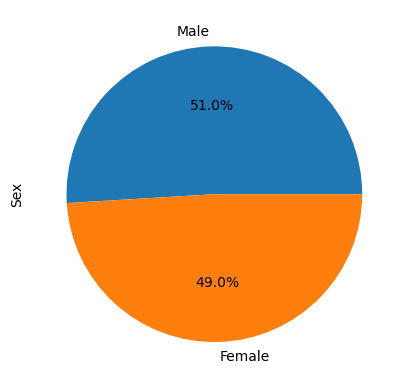

In [11]:
# Create a dataframe to use for the pie plot

# Creates a series with sex as the index
gender_count = cleaned_df["Sex"].value_counts()

# Resets the index to create a dataframe with sex and counts as the columns
gender_count_df = gender_count.reset_index()

# Renamed the columns to better match the desired labels for the pie graph
gender_count_df = gender_count_df.rename(columns={"Sex":"Gender","count":"Sex"})

# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot_drug_count = gender_count_df.plot(y='Sex', kind='pie', labels=gender_count_df['Gender'],
                                           autopct='%1.1f%%', legend=False)

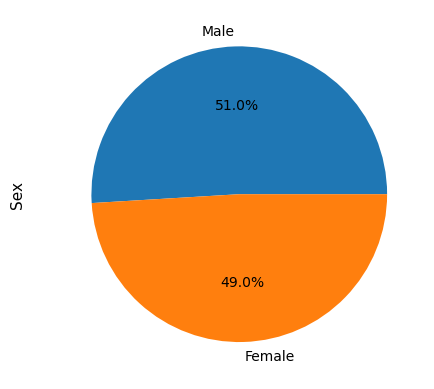

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create a list and labels for the pie plot
gender_list_count = [gender_count_df.iloc[0,1],gender_count_df.iloc[1,1]]
labels = ["Male", "Female"]

# Generates the pie plot using pyplot
plt.pie(gender_list_count,labels=labels, autopct='%1.1f%%')

# Apply and adjust title to the correct position on the pie plot
plt.text(-1.5, 0, 'Sex', rotation='vertical', fontsize=11, ha='center', va='center')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
largest_timepoint_series = cleaned_df.groupby("Mouse ID")["Timepoint"].max()
largest_timepoint_df = largest_timepoint_series.reset_index()
largest_timepoint_df = largest_timepoint_df.rename(columns={"Timepoint":"Final Timepoint"})
largest_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cleaned_with_largest_timepoint_df = pd.merge(cleaned_df, largest_timepoint_df, how='left', on='Mouse ID')

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capo_volume_data = []
ram_volume_data = []
infu_volume_data = []
ceft_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Function to calculate the interquartile range
def IQR(your_data):
    q1 = st.scoreatpercentile(your_data, 25)
    q3 = st.scoreatpercentile(your_data, 75)
    return q3 - q1

# Function to calculate the upper bound of the data for outliers
def upper_bound(your_data):
    q3 = st.scoreatpercentile(your_data, 75)
    iqr = IQR(your_data)
    return q3 + iqr*1.5

# Function to calculate the lower bound of the data for outliers
def lower_bound(your_data):
    q1 = st.scoreatpercentile(your_data, 25)
    iqr = IQR(your_data)
    return q1 - iqr*1.5

# Locate the rows which contain mice on each drug and get the tumor volumes

# Function for finding the final volume of a mouse using index number
def Final_Volume_Finder(index_number):
    mouse_id = cleaned_with_largest_timepoint_df.iloc[index_number, 0]
    f_timepoint = cleaned_with_largest_timepoint_df.iloc[index_number, 8]
    f_volume = cleaned_with_largest_timepoint_df.loc[(mouse_id == cleaned_with_largest_timepoint_df["Mouse ID"])&(f_timepoint==cleaned_with_largest_timepoint_df["Timepoint"]), "Tumor Volume (mm3)"]
    return f_volume.iloc[0]

# Creates lists of the final volumes of mices taking 'Capomulin', 'Ramicane', 'Infubinol', or 'Ceftamin'
index_num = -1
for drug in cleaned_with_largest_timepoint_df["Drug Regimen"]:
    index_num += 1
    if (drug == drug_list[0]) & (cleaned_with_largest_timepoint_df.iloc[index_num,1]==cleaned_with_largest_timepoint_df.iloc[index_num,8]):
        capo_volume_data.append(Final_Volume_Finder(index_num))
    if (drug == drug_list[1]) & (cleaned_with_largest_timepoint_df.iloc[index_num,1]==cleaned_with_largest_timepoint_df.iloc[index_num,8]):
        ram_volume_data.append(Final_Volume_Finder(index_num))
    if (drug == drug_list[2]) & (cleaned_with_largest_timepoint_df.iloc[index_num,1]==cleaned_with_largest_timepoint_df.iloc[index_num,8]):
        infu_volume_data.append(Final_Volume_Finder(index_num))
    if (drug == drug_list[3]) & (cleaned_with_largest_timepoint_df.iloc[index_num,1]==cleaned_with_largest_timepoint_df.iloc[index_num,8]):
        ceft_volume_data.append(Final_Volume_Finder(index_num))
    
# Creates a list of the volume data lists for use in the box plot 
box_data_list = [capo_volume_data, ram_volume_data, infu_volume_data, ceft_volume_data]
    
# Determine outliers using upper and lower bounds

# Function for finding the possible outliers and interquartile range in a dataset 
def outliers_with_IQR(name, your_data):
    flag = False
    outliers_list = []
    for item in your_data:
        if item < lower_bound(your_data) or upper_bound(your_data) < item:
            flag = True
            outliers_list.append(item)
    if flag == False:
        print(f"{name} has an IQR of {IQR(your_data).round(2)} and has no outliers.")
    else:
        print(f"{name} has an IQR of {IQR(your_data).round(2)} and its potential outliers are: {outliers_list}")

# Displays the IQRs and potential outliers of 'Capomulin', 'Ramicane', 'Infubinol', and 'Ceftamin'
outliers_with_IQR(drug_list[0], capo_volume_data)
outliers_with_IQR(drug_list[1],ram_volume_data)
outliers_with_IQR(drug_list[2],infu_volume_data)
outliers_with_IQR(drug_list[3],ceft_volume_data)

Capomulin has an IQR of 7.78 and has no outliers.
Ramicane has an IQR of 9.1 and has no outliers.
Infubinol has an IQR of 11.48 and its potential outliers are: [36.3213458]
Ceftamin has an IQR of 15.58 and has no outliers.


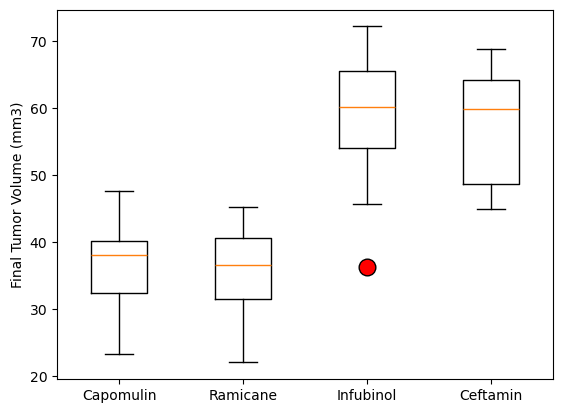

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(box_data_list, flierprops=dict(marker='o', markerfacecolor='red', markersize=12))

# Add y label
plt.ylabel('Final Tumor Volume (mm3)')

# Add x labels
plt.xticks([1, 2, 3, 4], drug_list)

# Display the plot
plt.show()

## Line and Scatter Plots

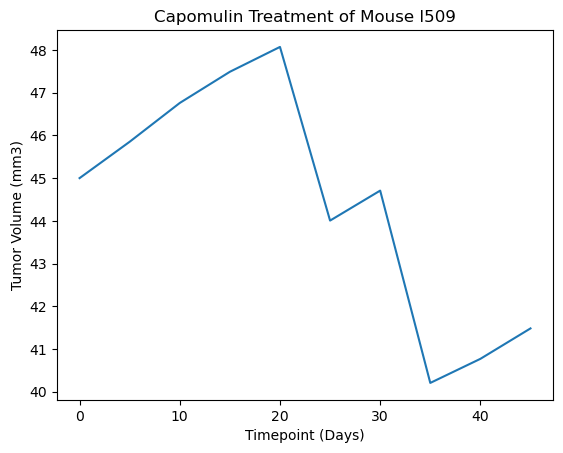

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Create a list of timepoints and tumor volume for mouse l509
mouse_l509_df = cleaned_with_largest_timepoint_df.loc[cleaned_with_largest_timepoint_df["Mouse ID"]=="l509"]
timepoint_l509_list = mouse_l509_df["Timepoint"]
volume_l509_list = mouse_l509_df["Tumor Volume (mm3)"]

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(timepoint_l509_list, volume_l509_list)

# Add labels and title
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')

# Display the plot
plt.show()

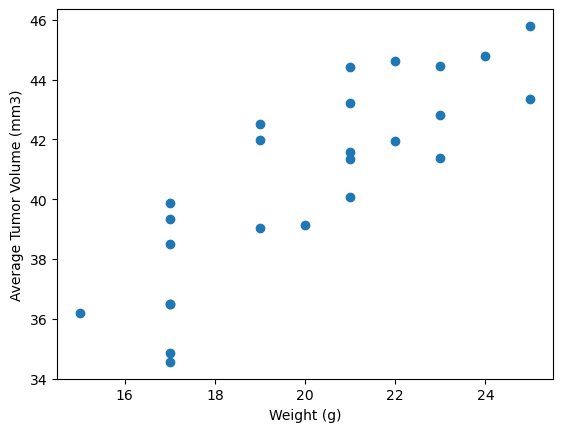

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Create lists of the average weight and volume for mices on the Capomulin drug regimen
capomulin_df = cleaned_with_largest_timepoint_df.loc[cleaned_with_largest_timepoint_df["Drug Regimen"]=="Capomulin"]
weight_capo_list = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
Tumor_volume_capo_list = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(weight_capo_list, Tumor_volume_capo_list)

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

## Correlation and Regression

The correlation coefficient is 0.84 and
the linear regression model is y=0.95x + 21.55


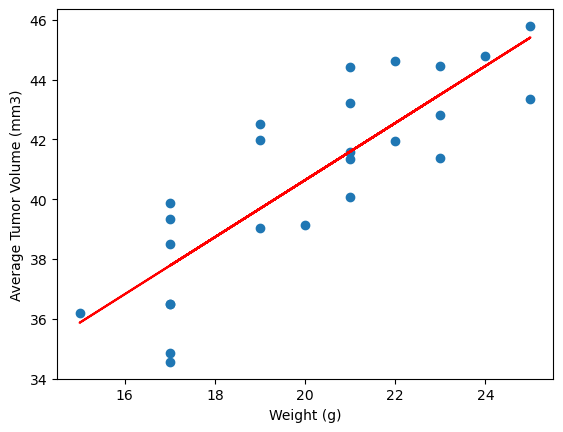

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculates correlation coefficient and linear regression using average weight and tumor volume list from earlier
slope, intercept, r_value, p_value, std_err = st.linregress(weight_capo_list, Tumor_volume_capo_list)

# Creates scatter plot using average weight and tumor volume list from earlier
plt.scatter(weight_capo_list, Tumor_volume_capo_list)

# Plot linear regression line using average weight and tumor volume list from earlier
plt.plot(weight_capo_list, slope*weight_capo_list + intercept, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the correlation coefficient and linear regression model above the plot
print(f'The correlation coefficient is {r_value.round(2)} and\nthe linear regression model is y={slope.round(2)}x + {intercept.round(2)}')

# Display the plot
plt.show()